# Dive Into Design Patterns

## Introduction to OOP

### Object Oriented Programming

UML class diagrams representing the "Cat" class object.
* Fields and Methods are the ***members*** of the class.
* Data stored in the corresponding fields is the ***state*** of the class.
* All methods define its ***behavior***.


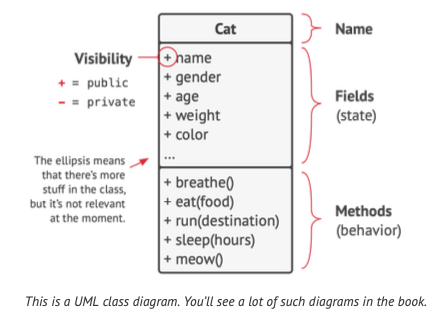

## Class Hierarchies

Sometimes the class structure could be further abstracted into a ***superclass*** to fulfill the role as the parent of more ***subclasses***.

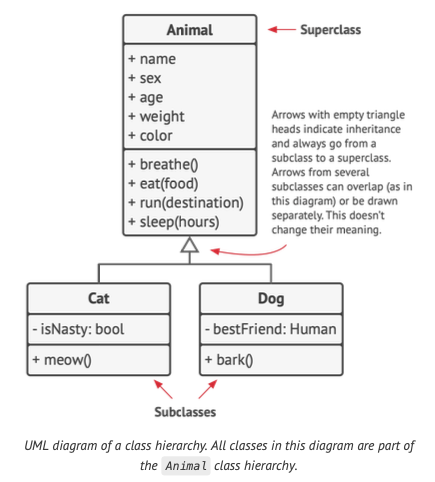

We could even go further as in:

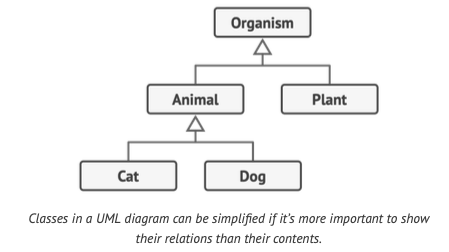

Subclasses can override the behavior of methods that they inherit from parent classes. A subclass can either completely replace the default behavior or just enhance it with some extra stuff.

## Pillars of OOP

* Abstraction
* Encapsulation
* Inheritance
* Polymorphism

### Abstraction

A model of a real-world object or phenomenon, limited to a specific context, which represents all details relevant to the context with high accuracy and omits all the rest.

### Encapsulation

Each object has an interface, a ***public*** part of an object, open to interactions with other objects.

Is the ability to hidde parts of its state and behaviors from other objects, exposing only a limited, but useful and operational, interface to the rest of the program.

Encapsulating means making it ***private***, and thus accesible only from within the methods of its own class.

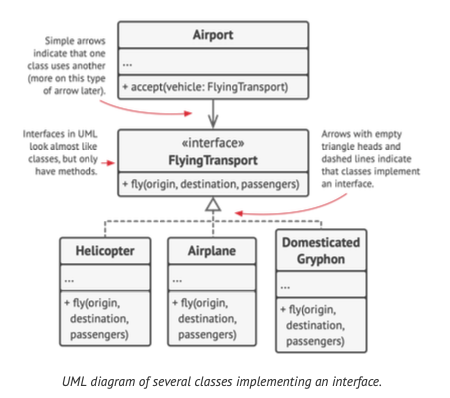

### Inheritance

Is the capability of constructing new subclasses from higher-order abstracted ones, allowing for code reusability and code centralization.

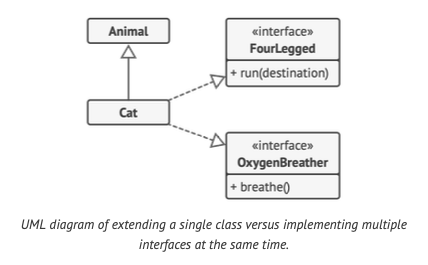

### Polymorphism

In the case of Animals, all animals would make a sound, but each animal would have a particular sound. This leads us to anticipate that the parent class should have the ***make_sound abstract*** method, and that all subclasses should override it to fit their desired sound.

This corresponds to the ability of a single parent class to acquire multiple forms.

## Relations Between Objects

### Dependency

Is the most basic and the weakest type of relations between classes.

There is a dependency between two classes if some changes to the definition of one class might result in modifications to another class.

Usually appears when using concrete classes and names in code and can be made weaker by adding interfaces or abstract classes.

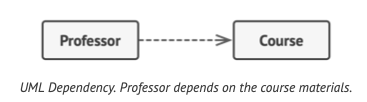

### Association

A relationship in which one object uses or interacts with another. A bi-directional association is normal.

Association can be seen as a specialized kind of dependency, where an object always has access to the objects with which it interacts, stablishing a permanent link. It generally relates to a field that contains some other object or a method that returns some other object.

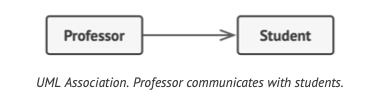

### Aggregation

A particular type of association that represents ***one-to-many***, ***many-to-many*** or ***whole-part*** relations between multiple objects.

Under aggregation, an object has a set of other objects and serves as a container or collection. 

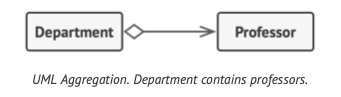

A ***Department*** can have 0, 1 or many ***Professor***s

### Composition

A specific kind of aggregation, where one object is composed of one or more instances of the other. It is distinct in the sense that the component can only exist as a part of the composition.

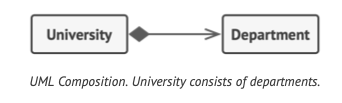

### The Big Picture

* **Dependency:** Class A can be affected by changes in Class B.
* **Association:** Object A knows about object B. Class A depends on B.
* **Aggregation:** Object A knows about Object B, and consists of B. Class A depends on B.
* **Composition:** Object A knows about Object B, consists of B, and manages B's life cycle. Class A depends on B.
* **Implementation:** Class A defines methods declared in interface B. Objects A can be treated as B. Class A depends on B.
* **Inheritance:** Class A inherits interface and implementation of class B but can extend it. Objects A can be treated as B. Class A depends on B.

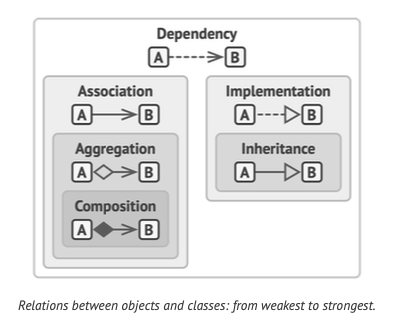

## Introduction to Patterns

### What's a Design Pattern?

Pre-made customizable blue-prints that help in solving recurring design problems in software development. A general concept for solving a particular problem.

#### What does the pattern consist of?

* ***Intent:*** Briefly describing both the problem and the solution.
* ***Motivation:*** Explaining the problem and the solution the pattern makes possible.
* ***Structure:*** Classes of each part of the pattern and how they are related.
* ***Code example:*** Makes it easier to grasp the idea behind the pattern.

#### Classification of patterns

Design patterns differ in their complexity, level of detail and scale of applicability. 

The most basic and low-level patterns are often called *idioms* and they usually apply to a single programming language.

The most universal and high-level patterns are *architectural* patterns. Developers can implement these patterns in virtually any language and can be used to design the architecture of an entire application.

* ***Creational Patterns:*** Provide object creation mechanisms that increase flexibility and reuse of existing code.
* ***Structural Patterns:*** Explain how to assemble objects and classes into larger structures, while keeping these structures flexible and efficient.
* ***Behavioral Patterns:*** Take care of effective communication and the assignment of responsibilities between objects.

#### Who invented patterns?

Patterns are typical solutions that arise from common problems in object-oriented design. When a solution gets repeated over and over, someone eventually abstracts it, names it and describes it in detail.

### Why Should I Learn Patterns?

They are a toolkit of tried and tested solutions to common problems that help when thinking of or designing software.

They also define common concepts that encapsulate deeper meaning and that make communication simpler and more straightforward.

## Software Design Principles

### Features of Good Design

#### Code Reuse

Cost and time are the main relevant KPIs in software development. In this, code reusability is one of the principal ways to reduce developing costs. Instead of developing the same thing over and over, just reuse existing code.

It turns out that making reusable code is not easy though. Coupling, dependencies, hardcoding and such, all reduce flexibility and make code harder to reuse.

Design patterns are a helpful framework to increase code reusability, but might lead to more complex code.

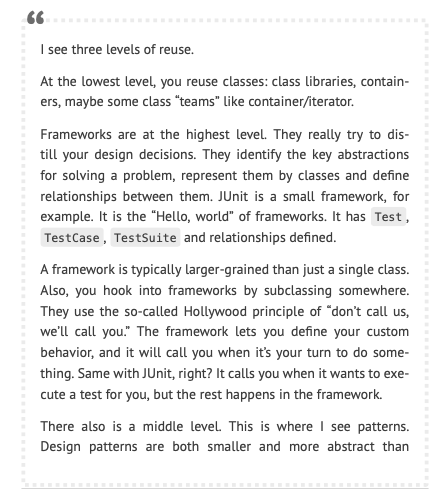
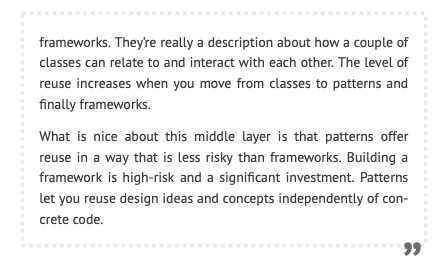

#### Extensibility

***Change*** is a constant in programming.

Before developing a solution we conceive an idea of it. After developing the solution we gained deep insight on its inner workings and could proceed to reformulate a better solution while you have also gained some skill, so your developed code will always be outdated.

The problem for which we are developing the solution might also change. A client might want something more, something different, or something less. With a good displayed solution, a client would usually want more.

That's why its important to develop code that can change in a relatively easy way.

### Design Principles

#### Encapsulate What Varies

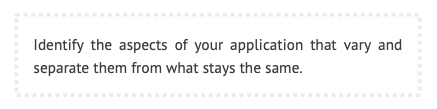

Minimize the repercusion of changes by isolating the varying parts of code in independent modules, which protects the rest of the code from adverse effects.

##### Encapsulation on a Method Level

A piece of code that calculates the total amount that a customer needs to pay based on their location requires to know about the different taxes. Furthermore, taxes can change, meaning that the piece of code related to taxes has a high probability of changing in the future.

###### Example

In [ ]:
def get_order_total(order):
    total = 0
    for item in order:
        total += item.price * item.quantity
        if order.country == 'US':
            total += total * 0.07 ## US sales tax
        elif order.country == 'EU':
            total += total * 0.20 ## European VAT
    return total

###### Encapsulation

In [ ]:
def get_order_total(order):
    total = 0
    for item in order:
        total += item.price * item.quantity
    total += total * get_tax_rate(order.country)
    return total

def get_tax_rate(country):
    if country == 'US':
        return 0.07 ## US sales tax
    elif country == 'EU':
        return 0.20 ## European VAT

##### Encapsulation on a Class Level

Over time, methods tend to turn more complicated, adding behaviors that require their own attributes and obfuscate the primary responsability of the containing class. Extracting everything to a new class makes the code clearer.

###### Example

In [ ]:
class Order:
    def __init__(self, items, country, state, city, **args):
        self.items = items
        self.country = country
        self.state = state
        self.city = city
        #...
    def get_order_total(self):
        pass
    @classmethod # could be with self, but still
    def get_tax_rate(country, state, product):
        pass

###### Encapsulation

In [ ]:
class Order:
    def _init_(self, items, country, state, city, taxCalculator, **args):
        self.items = items
        self.country = country
        self.state = state
        self.city = city
        self.taxCalculator = taxCalculator
        # ...
    def get_order_total(self):
        total = 0
        for item in self.items:
            total += item.price * item.quantity
        tax = total * self.taxCalculator(self.country, self.state, item)
        total += tax
        return total

#### Program to an Interface, not an Implementation

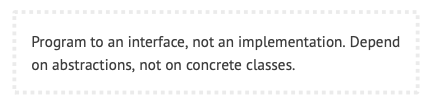

A design is flexible enough if you can easily change it or extend it without braking the already existing code.

The first approach of making two classes work together is by making one dependent on the other, but there are better more flexible ways to make those classes collaborate.

1. What exactly is needed by one object from the other? ***[Which methos does it use?]***
2. Define those methods in a new interface or abstract class.
3. Implement the class that work as a dependency with the new interface.
4. Make the first class dependent on the interface, rather than the other class.

Working ends up being the same, but the dependency injection is now much more flexible.

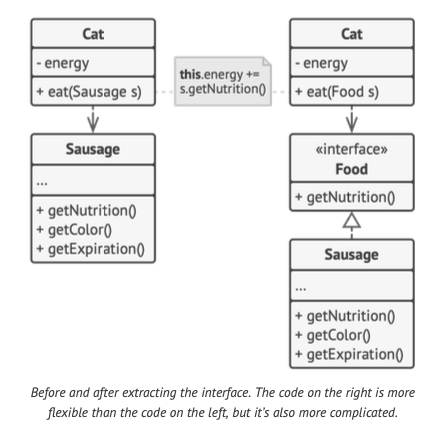

##### Example

In [ ]:
class Company:
    def __init__(self, designer, programmer, tester):
        self.designer = designer
        self.programmer = programmer
        self.tester = tester
    def create_software(self):
        self.designer.design_architecture()
        self.programmer.write_code()
        self.tester.test_software()
        
class Designer:
    def __init__(self):
        pass
    def design_architecture(self):
        pass
    
class Programmer:
    def __init__(self):
        pass
    def write_code(self):
        pass
    
class Tester:
    def __init__(self):
        pass
    def test_software(self):
        pass

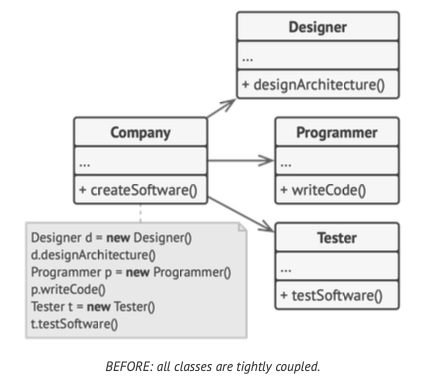

##### With Interface

In [ ]:
from abc import ABC, abstractmethod

class Company:
    def __init__(self):
        self.employees = [
            Designer,
            Programmer,
            Tester
        ]
    def create_software(self):
        for employee in self.employees:
            employee.do_work()

class Employee(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def do_work(self):
        pass
    
class Designer(Employee):
    def do_work(self):
        self.design_architecture()
    def design_architecture():
        pass
    
class Programmer(Employee):
    def do_work(self):
        self.write_code()
    def write_code(self):
        pass
    
class Tester(Employee):
    def do_work(self):
        self.test_software()
    def test_software(self):
        pass

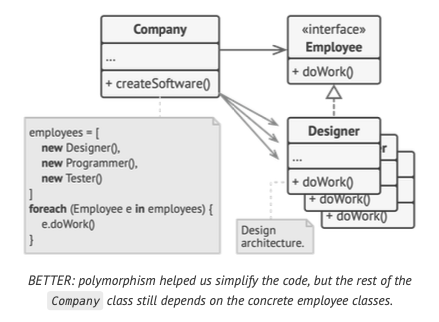

***We just implemented the Factory Method pattern! ;)***

##### Furthermore

In [ ]:
from abc import ABC, abstractmethod

class Company(ABC):
    def __init__(self, employees):
        self.employees = self.get_employees()
    @abstractmethod
    def get_employees(self):
        pass
    @abstractmethod
    def create_software(self):
        for employee in self.employees:
            employee.do_work()
            
class GameDevCompany(Company):
    def get_employees(self):
        return [
            Designer,
            Artist,
            Programmer
        ]
    
class OutsourcingCompany(Company):
    def get_employees(self):
        return [
            Programmer,
            Tester,
            Salesman
        ]

class Employee(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def do_work(self):
        pass
    
class Designer(Employee):
    def do_work(self):
        self.design_architecture()
    def design_architecture():
        pass
    
class Programmer(Employee):
    def do_work(self):
        self.write_code()
    def write_code(self):
        pass
    
class Tester(Employee):
    def do_work(self):
        self.test_software()
    def test_software(self):
        pass

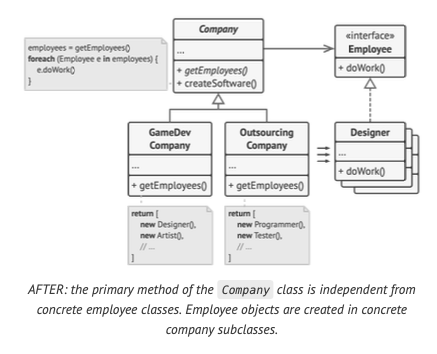

#### Favor Composition Over Inheritance

Inheritance is veyr straightforward and helpful, but comes with many problems that start becoming apparent after the program has a lot of interacting classes and changing anything becomes very hard.

* **A child class has to use all the abstract methods defined in the parent class**
* **When changing methods you need to verify that the new behavior is compatible with the base behavior** (You want to be able to pass the child class to any code that expects the parent class without breaking it)
* **Inheritance breaks encapsulation of the parent class** (Internal details of the parent class are accesed by all the child classes)
* **Child classes are thighly coupled with the parent class**
* **Reusing code through inheritance might lead to parallell inheritance hierarchies**

Composition switchs to ***"is a"*** to ***"has a"***.

###### Example

In [ ]:
from abc import ABC, abstractmethod

class Transport(ABC):
    def __init__(self):
        pass
    
class Truck(Transport):
    pass

class Car(Transport):
    pass

class ElectricTruck(Truck):
    pass

class CombustionEngineTruck(Truck):
    pass

class ElectricCar(Car):
    pass

class CombustionEngineCar(Car):
    pass

class AutopilotElectricTruck(ElectricTruck):
    pass

class AutopilotCombustionEngineTruck(CombustionEngineTruck):
    pass

class AutopilotElectricCar(ElectricCar):
    pass

class AutopilotCombustionengineCar(CombustionEngineCar):
    pass

***Every distinctive feature ends up being a new inheritance that has to address all the inheritances above. And every change in a class has to cascade below.***

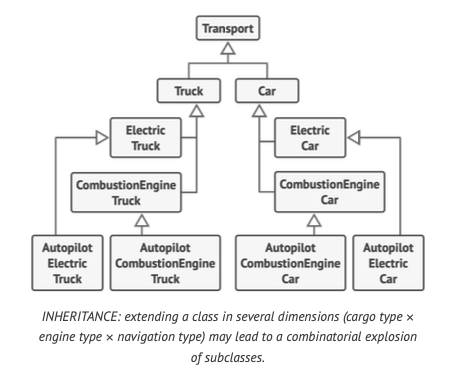

##### Composition

In [ ]:
from abc import ABC, abstractmethod

class Transport(ABC):
    def __init__(self, engine, driver, chasis):
        self.engine = engine
        self.driver = driver
        self.chasis = chasis
    @abstractmethod
    def deliver(self, destination, cargo):
        pass
    
class Engine(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def move(self):
        pass
    
class CombustionEngine(Engine):
    pass

class ElectricEngine(Engine):
    pass

class Driver(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def navigate(self):
        pass
    
class Robot(Driver):
    pass

class Human(Driver):
    pass

class Chasis(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def kind(self):
        pass
    
class Car(Chasis):
    def kind(self):
        return 'Car'
    
class Truck(Chasis):
    def kind(self):
        return 'Truck'

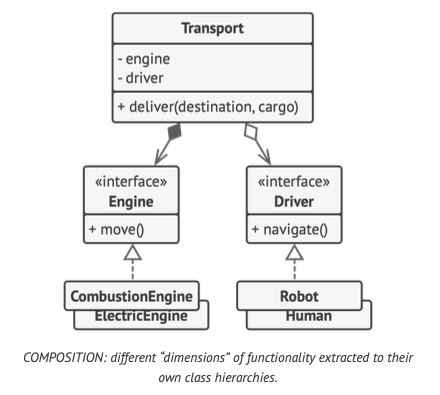

### SOLID Principles

A mnemonics for some design principles that allo for clearer, cleaner and more flexible software designs, and thus more maintanable and extendable code.

Don't over do it.

#### Single Responsibility Principle

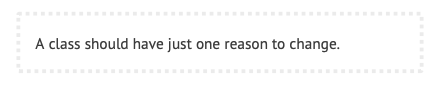

Make all classes responsible for a single part of the functionality of the solution, and make it completely encapsulated.

By applying modularity you reduce overall complexity.

When classes grow large is hard to work with them and if it does too many things, there will be the need to change it everytime any of those things change.

If the code feels overwhelming, focus on the specific aspects and divide classes into parts.

##### Example

In [ ]:
class Employee:
    def __init__(self, name):
        self.name = name
    def get_name(self):
        return self.name
    def print_time_sheet_report(self):
        pass

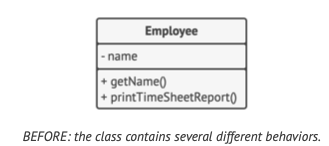

##### SOLID Approach

In [ ]:
class Employee:
    def __init__(self, name):
        self.name =name
    def get_name(self):
        return self.name
    
class TimeSheetReport:
    def __init__(self):
        pass
    def display(self, employee):
        pass

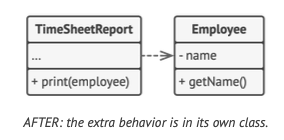

#### Open/Closed Principle

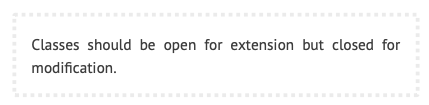

Main idea if this principle is to keep already existing code from breaking when new code is added. 

An ***open*** class can be extended, inherited from, add new methods or attributes, and change base behavior. 

A ***closed*** class is a completed class if it's 100% implemented and used by other classes, with a clear interface that won't change in the future.

If a class is closed, making changes is riskier, better create a child class and override the parts that you want to modify. This way you achieve the intended outcome without breaking the closed class.

Keep in mind that a child shouldn't be responsible for it's parents issues.

##### Example

In [ ]:
class Order:
    def __init__(self, items, shipping):
        self.items = items
        self.shipping = shipping
    def get_total(self):
        pass
    def get_total_weight(self):
        pass
    def get_shipping_type(self):
        pass
    def get_shipping_cost(self):
        if self.shipping == 'ground':
            if get_total > 100:
                return 0
            return max(10, self.get_total_weight() * 1.5)
        elif self.shipping == 'air':
            return max(20, self.get_total_weight() * 3)
    def get_shipping_date(self):
        pass

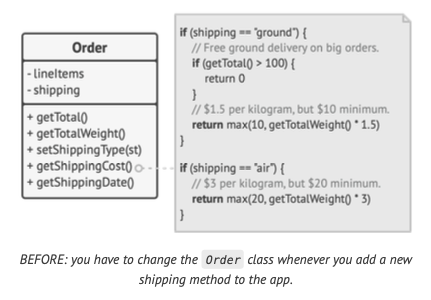

##### Open/Closed Extension 

In [ ]:
from abc import ABC, abstractmethod

class Shipping(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def get_cost(order):
        pass
    @abstractmethod
    def get_date(order):
        pass
    
class GroundShipping(Shipping):
    def __init__(self):
        self.type = 'ground'
    def get_cost(self, order):
        if order.get_total() > 100:
            return 0
        return max(10, order.get_total_weight() * 1.5)
    
class AirShipping(Shipping):
    def __init__(self):
        self.type = 'air'
    def get_cost(self, order):
        return max(20, order.get_total_weight() * 3)
    
class Order:
    def __init__(self):
        pass
    def get_total(self):
        pass
    def get_total_weight(self):
        pass
    def get_shipping_type(self, shipping):
        return shipping.type
    def get_shipping_cost(self, shipping):
        return shipping.get_cost(self)
    def get_shipping_date(self):
        pass

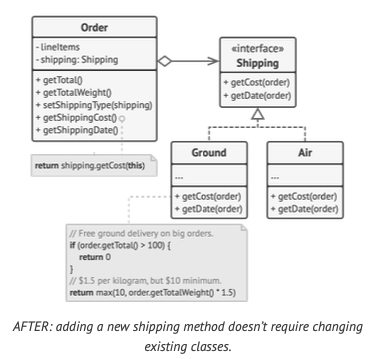

Now, if the necessity to implement a new Shipping method arises, we can just derive a new class from Shipping without changing the Order class.

#### Liskov Substitution Principle

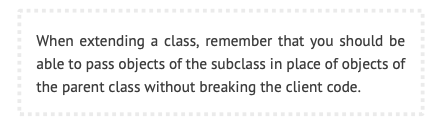

Child classes should remain compatible with the parents behavior. When overriding the parent class, extend the base behavior rather than replacing it.

***Critical when developing libraries and frameworks.***

This principle is a set of formal requirements to test if the above is true.

* ***Parameter types in a method of a child should match or have a higher level of abstraction that parameter types in the parent class:***
    * A class with a method to airships an order: `ship(order, AirShipping)`
        * ***Good:*** Create a child class that overrides the method so that it can use any Shipping `ship(order, Shipping)`. Passing an object of the AirShipping class still works fine, but functionality is expanded to any Shipping class.
        * ***Bad:*** Create a child class that overrides the method so that it can only use USAirShipping `ship(order, USAirShipping)`. When connecting with the designed framework there will be incongruencies if the child class were to be implemented, as the framework wasn't developed for USAirShipping.<br><br>
        
* ***Return type in a method of a child class should match or be a subtype of the return type of the parent class:***
     * A class with a method to buy a Truck `buy_truck() -> Truck`
         * ***Good:*** A child class that overrides the method to buy an ElectricTruck `buy_truck() -> ElectricTruck`. The method now returns an ElectricTruck which is still a Truck.
         * ***Bad:*** A child class that override the method to buy Transport `buy_truck() -> Transport`. The method now returns a Transport object which might not necessarily be a Truck.
         
     ***Radical notion is when the parent method returns a string, but the child method returns an int***<br><br>
     
* ***A child class shouldn't thrown Exceptions that the parent class isn't expected to throw:***
    * Types of Exceptions should match or be subtypes of the parent class, as if they were returns.
    ***It is much more critical though, as if a `try/except` block doesn't get an expected Exception, the Exception could go unnoticed.***
    
    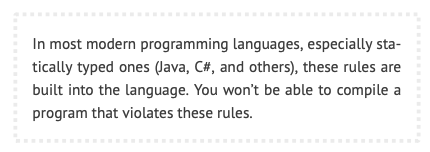
    
* ***A child class shouldn't strenghten pre-conditions:***
    * A parent class' method has a parameter with type `int`. If a child class overrides this method and requires that the value satisfy certain condition, as in `int > 0`, the client might not know and will break when working with values it is expected to work with.<br><br>
    
* ***A child class shouldn't weaken post-conditions:***
    * A parent class' method works with a database and always closes it after the request. If a child class changes it so that the database stays open, the client might not know and there will be a leftover database connection that wasn't handled.<br><br>
    
* ***Invariants of a parent class must be preserved:***
    * Invariants are abstract and hard to stablish, but they should not change.
    
    ***Basic approach is to just extend classes by adding new fields and methods, instead of messing with the already existing ones.***<br><br>
    

* ***A child class shouldn't change values of private fields of the parent class:***
    * Expect a reason of why they were supposed to be private.

##### Example

In [ ]:
from abc import ABC, abstractmethod

class Document(ABC):
    def __init__(self, data, filename):
        self.data = data
        self.filename = filename
    @abstractmethod
    def open_doc(self):
        pass
    @abstractmethod
    def save(self):
        pass
    
class ReadOnlyDocument(Document):
    def save(self):
        raise Exception('Unable to save read-only file.')
        
class Project:
    def __init__(self, documents):
        self.document = documents
    def openAll(self):
        for doc in self.documents:
            doc.open_doc()
    def saveAll(self):
        for doc in self.documents:
            if not isinstance(doc, ReadOnlyDocument):
                doc.save()

***As the ReadOnlyDocument added an Exception for which the Document parent class is unaware, the class Project must test to see if each doc is a ReadOnlyDocument or not.***

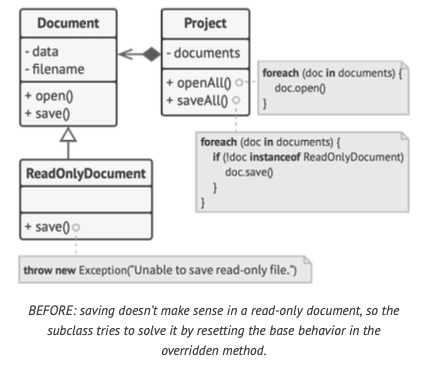

##### Liskov Substitutable

In [ ]:
from abc import ABC, abstractmethod

class Document(ABC):
    def __init__(self, data, filename):
        self.data = data
        self.filename = filename
    @abstractmethod
    def open_doc(self):
        pass
    
class WritableDocument(Document):
    def save(self):
        pass
    
class Project:
    def __init__(self, all_docs, writable_docs):
        self.all_docs = all_docs
        self.writable_docs = writable_docs
    def open_all(self):
        for doc in self.all_docs:
            doc.open()
    def save_all(self):
        for doc in self.writable_docs:
            doc.save()

***A child class should extend the behavior of a parent class. Thus `WritableDocument(Document)` instead of `ReadOnlyDocument(Document)`.***

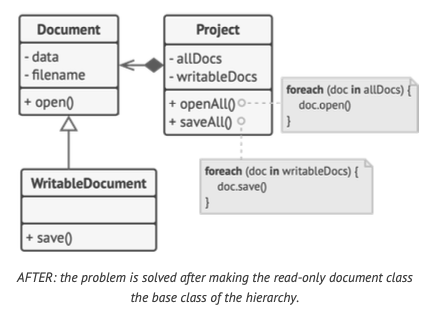

#### Interface Segregation Principle

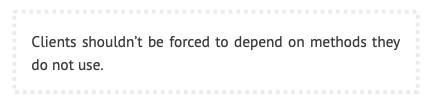

Make interfaces specific enough that clients classes don't require to use behaviors they don't need. Reduce dependencies.

Breaking large interfaces into more granular and specific ones.

There's no limitation on how many interfaces a class can have, so no need to bundle all interfaces together.

##### Example

In [ ]:
from abc import ABC, abstractmethod

class CloudProvider(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def get_file(self, name):
        pass
    @abstractmethod
    def create_server(self, region):
        pass
    @abstractmethod
    def list_servers(self, region):
        pass
    @abstractmethod
    def get_CDN_address(self):
        pass

class Amazon(CloudProvider):
    pass

class Dropbox(CloudProvider):
    pass

***But Dropbox doesn't have the functionality for the server methods!***

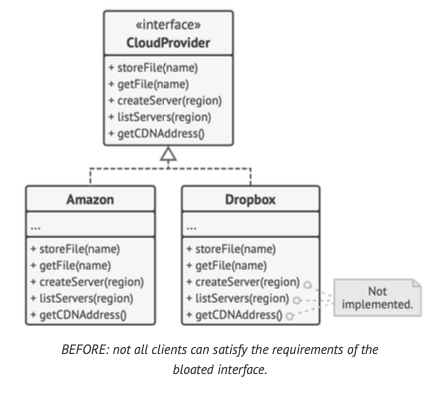

##### Segregated Interface

In [ ]:
from abc import ABC, abstractmethod

class CloudHostingProvider(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def create_server(self, region):
        pass
    @abstractmethod
    def list_servers(self, region):
        pass
    
class CDNProvider(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def get_CDN_address(self):
        pass

class CloudStorageProvider(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def store_file(self, name):
        pass
    @abstractmethod
    def get_file(self, name):
        pass
    
class Amazon(CloudHostingProvider, CDNProvider, CloudStorageProvider):
    def __init__(self):
        pass
    def create_server(self, region):
        pass
    def list_servers(self, region):
        pass
    def get_CDN_address(self):
        pass
    def store_file(self, name):
        pass
    def get_file(self, name):
        pass
    
class Dropbox(CloudStorageProvider):
    def __init__(self):
        pass
    def store_file(self, name):
        pass
    def get_file(self, name):
        pass        

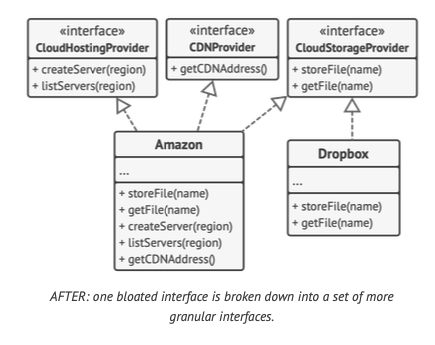

#### Dependency Inversion Principle

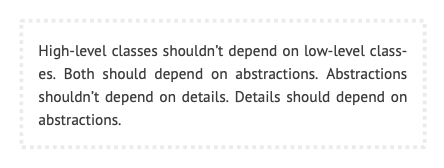

There's usually a distinction between classes:
* ***Low-level classes:*** implements basic single operations.
* ***High-level classes:*** implements complex working logic that manages low-level classes.

A common approach is to start from the low-level, creating many primitive classes that do each thing. And then transition to developing the high-level classes based on the developed low-level ones.

Dependency inversion principle suggest starting from the high-level and start designing the low level that is required to fullfill the high-level requirements.

1. Start by describing interfaces for low-level operations that the high-level classes use. As `readDatabase(database)` instead of `connectDatabase(database)`, `queryDatabase(database)`, `closeDatabase(database)`.

2. Now high-level classes depend on those interfaces, instead on very specific low-level classes, creating softer dependencies.

3. Finally, implement the interfaces for the low-level classes, making them dependent on the high-level logic, instead of the other way around.

##### Example

In [ ]:
class BudgetReport:
    def __init__(self, database):
        self.database = database
    def open_database(self, date):
        self.database.insert(date)
    def save_database(self):
        self.database.update()
        
class MySQLDatabase:
    def __init__(self):
        pass
    def insert(self):
        pass
    def update(self):
        pass
    def delete(self):
        pass

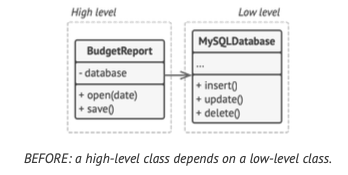

##### Dependency Inversion

In [ ]:
from abc import ABC, abstractmethod

class BudgetReport:
    def __init__(self, database):
        self.database = database
    def open_database(self, date):
        self.database.insert(date)
    def save_database(self):
        self.database.update()
        
class Database(ABC):
    def __init__(self):
        pass
    @abstractmethod
    def insert(self):
        pass
    @abstractmethod
    def update(self):
        pass
    @abstractmethod
    def delete(self):
        pass
    
class MySQL(Database):
    def __init__(self):
        pass
    def insert(self):
        pass
    def update(self):
        pass
    def delete(self):
        pass
    
class MongoDB(Database):
    def __init__(self):
        pass
    def insert(self):
        pass
    def update(self):
        pass
    def delete(self):
        pass

***Now Dependencies are radicated in the Database abstract class and the child classes must fulfill them. Instead of the BudgetReport class having all the dependencies of the low-level Database classes.***
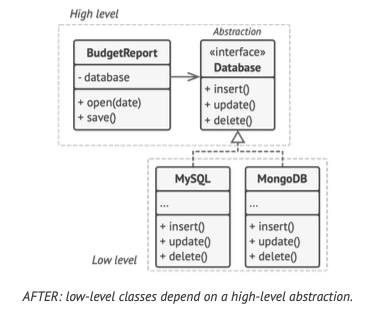

## Catalog of Design Patterns

### Creational Design Patterns

* ***Factory Method***
* ***Abstract Factory***
* ***Builder***
* ***Prototype***
* ***Singleton***

#### Factory Method

Design Patternt that works with an interface for creating objects in a parent class, allowing child classes to alter the types of objects created.

##### Problem

You have designed a graphics editor where users can draw different shapes. initially it only supported drawing rectangles, so an important part of your code was encapsulated in the `Rectangle` class.

The need arises for other figures, but your code is thightly coupled with the `Rectangle` class, so adding a `Circle` or `Triangle` would require a ton of changes in the codebase. And if more figures were to be added in the future, there would be even more coupling after adding `Circle` and/or `Triangle`.

##### Solution

Factory Method pattern works by implementing an interface (Factory) that replaces the direct objects construction for a special `create/produce/new` factory call.

***As in, "the Factory gets an order and produces the requested product."***

It might useless, we just moved the constructor call from one place to another. But, now you can override the factory method in a child class and change the class of products being delivered.

But child classes may return different types of objects only of these objects have a common abstract parent class. (As in SOLID, for interoperability. Otherwise, why do it?)

To handle this, ***the factory method in the parent class SHOULD have its return type declared.***

In [ ]:
from abc import ABC, abstractmethod

class Transport(ABC):
    @property
    @abstractmethod
    def kind(self):
        pass
    def deliver(self):
        pass
    
class Truck(Transport):
    def kind(self):
        return 'Truck'
    def deliver(self):
        pass
    
class Ship(Transport):
    def kind(self):
        return 'Ship'
    def deliver(self):
        pass

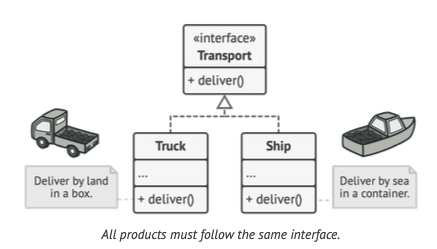

The code that uses the factory method doesn't see a difference wether the Transport is a `Truck` or a `Ship`, it just wants to `deliver`. Treats everything just as `Transport`.

How each of the `Transport` objects does the `deliver` is not relevant to it.

##### Structure

In [ ]:
from abc import ABC, abstractmethod

class Product(ABC):
    @abstractmethod
    def do_stuff(self):
        pass
    
class ConcreteProductA(Product):
    def do_stuff(self):
        print('Concrete ProductA Stuff')
        
class ConcreteProductB(Product):
    def do_stuff(self):
        print('Concrete ProductB Stuff')

class Creator(ABC):
    @abstractmethod
    def some_operation(self):
        product = self.create_product()
        product.do_stuff()
    @abstractmethod
    def create_product(self):
        pass
        
class ConcreteCreatorA(Creator):
    def create_product(self):
        return ConcreteProductA()
    
class ConcreteCreatorB(Creator):
    def create_product(self):
        return ConcreteProductB()

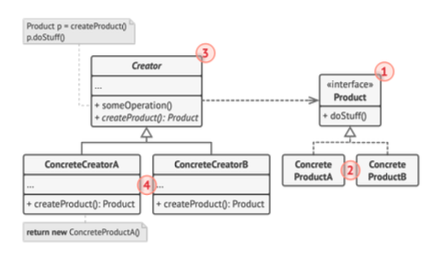

1. The ***Product*** declares the interface that is shared between all objects that can be created by the ***Creator*** and its child classes.
2. ***ConcreteProducts*** are particular implementations of the ***Product*** interface.
3. The ***Creator*** class defines the factory method that returns new product objects. ***Product*** creation is ***NOT*** its primary responsibility though, it has core business logic related to the use of those ***Product***s and just creates them as needed.
4. ***ConcreteCreators*** override the base factory method and return a different type of product with the respective needed logic. It can also return existing objects stored in memory, instead of creating a new one everytime. 

##### Example

In [ ]:
from abc import ABC, abstractmethod

class Button(ABC):
    @abstractmethod
    def render(self):
        pass
    @abstractmethod
    def on_click(self):
        pass        
    
class WindowsButton(Button):
    def render(self):
        print('Windows Render')
    def on_click(self):
        print('Windows Click')
        
class HTMLButton(Button):
    def render(self):
        print('HTML Render')
    def on_click(self):
        print('HTML Click')

class Dialog(ABC):
    @abstractmethod
    def render(self):
        button = self.create_button()
        button.on_click()
        button.render()
    @abstractmethod
    def create_button(self):
        pass
        
class WindowsDialog(Dialog):
    def create_button(self):
        return WindowsButton()
    
class WebDialog(Dialog):
    def create_button(self):
        return HTMLButton()
    
class Application:
    def initialize(self):
        config = self.read_Application_config()
        if config.OS == 'Windows':
            self.dialog = WindowsDialog()
        elif config.OS == 'Web':
            self.dialog = WebDialog()
        else:
            raise Exception('Error. OS not implemented!')
    def main(self):
        self.initialize()
        self.dialog.render()
    def read_Application_config(self):
        pass

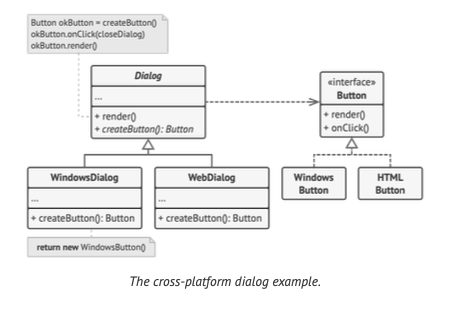

If you were to add more Operating Systems or More Buttons you wouldn't need to change the logic of the `Dialog` class, and just add to the logic for tha handling of the type of `Dialog` and `Button`.

##### Applicability

* Use the Factory Method when the exact types and dependecies of the needed classes aren't known beforehand.
    * The Factory Method dissociates product construction code from product use code, making it easier to extend the product construction independently from the rest of the code. (Product creation is encapsulated)
    
* Use the Factory Method to allow for a way to extend internal components of a framework.
    * Inheritance would be the straightforward approach to do it, but the framework might not neccesary be compatible with the new class. By encapsulating the construction of components across the framework into a unique factory method and letting it be overriden as the componentes are extended, compatible extensions can be added.
        * *With Inheritance:* You are developing an app with an open source UI framework which only provides round buttons, but your app should have square buttons. So you extend the `UIframework.Button` class with `SquareButton`, but now you need tell the `UIframework` that `Squarebutton` should be used instead of `Button`.
        * *With Factory Method:* You create a child class `UIWithRoundButtons` from the parent framework class and override the `createButton` method to return `SquareButton` instead of `Button`. Now use `UIWithRoundbuttons` instead of `UIframework`.
        
* Use the Factory Method when you want to reutilize existing objects instead of rewriting them each time.
    * By encapsulating the construction of objects you can easily manage the creation procedure to verify existence and return the existing objecet when needed.

##### How to Implement

1. Make all `Product`s follow the same interface. All methods should make sense in every `Product`.
2. Add an empty factory method in the `Creator` class. It should return the abstract `Product`.
3. In the `Creator` find all references to `Product` constructions and replace them with calls to the factory method, while extracting the `Product` creation code into the factory method.
    * At this point there might need to be a parameter and a switch statement to choose which product to construct. But it can be made smoother.
4. Write a set of `Creator` child classes for each type of `Product` listed in the factory method and override the factory method in the child class integrating the particular logic of that `Product`that was extracted and introduced in the factory method.
5. If there are to many children of `Product` and it doesn't make sense to write each of them, you can reuse the control parameter from the parent class in child classes.
    * As in having a `Mail` class with children `AirMail` and `GroundMail`, a `Transport` class with children `Plane`, `Truck` and `Train`. Where `AirMail` only uses `Plane` and `GroundMail` might use `Truck` or `Train`.
        A. You can create child classes as in `TruckMail(GroundMail, Truck)` or `TrainMail(GroundMail, Train)`.
        B. The client code can pass an argument to the factory method of `GroundMail` that specifies if it uses `Truck` or `Train`.
6. If by the end the factory method is empty, make it abstract, otherwise make it the default behavior.

##### Pros and Cons

* ***Pros:***
    * Avoid thigh coupling between `Creator` and children of `Product`
    * Single Responsibility Principle. Splitting creation from definition responsibilites.
    * Open/Closed Principle. Encapsulation of creation and definitions allows for introducing new types of products without breaking the client code.
* ***Cons:***
    * Code structure might become more complex as a lot of child classes need to be implemented.

##### Relations with Other Patterns

* Many patterns start with the ***Factory Method*** and evolve towards ***Abstract Factory***, ***Prototype***, or ***Builder***.
* ***Abstract Factory*** classes are often based on a set of ***Factory Methods***, but ***Prototype*** can also be used to compose the method of the classes.
* ***Factory Method*** with ***Iterator*** lets collection of child classes return different types of iterators that are collection-like.
* ***Prototype*** isn't based on inheritance, so avoids its drawback, but requires complex initializations. ***Factory Method*** is based on inheritance but doesn't require initialization.
* ***Factory Method*** is a specialization of ***Template Method***, and may serve as a step in a large Template Method***.

#### Abstract Factory

##### Problem

You are creating a transport ticket sales software, were you are required to handle classes that represent:

* A familiy of related tranports' tickets, as in `BusTicket`, `TrainTicket`, and `PlaneTicket`.
* Several variants of each of the transports' tickets, as in `Economy`, `Business`, and `Premium`
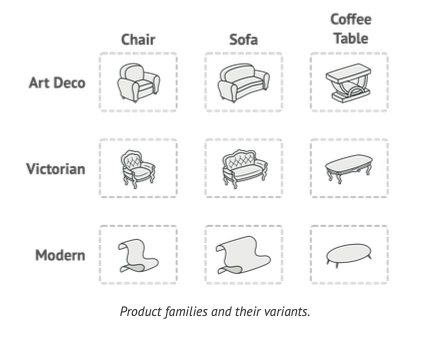

As with the ***Factory Method*** you want to be able to add new options without disrupting existing code.

##### Solution

Create an interface for each of the kinds of tickets that you want to sell. Then make the variants of the same ticket inherit from the interface.

In [ ]:
from abc import ABC, abstractmethod

class BusTicket(ABC):
    @abstractmethod
    def trip_time(self):
        pass
    @abstractmethod
    def bus_number(self):
        pass
    @abstractmethod
    def seat(self):
        pass
    @abstractmethod
    def perks(self):
        pass
    
class EconomyBusTicket(BusTicket):
    def trip_time(self):
        pass
    def bus_number(self):
        pass
    def seat(self):
        pass
    def perks(self):
        print('No Perks!')
        
class BusinessBusTicket(BusTicket):
    def trip_time(self):
        pass
    def bus_number(self):
        pass
    def seat(self):
        pass
    def perks(self):
        print('Some Perks.')
        
class PremiumBusTicket(BusTicket):
    def trip_time(self):
        pass
    def bus_number(self):
        pass
    def seat(self):
        pass
    def perks(self):
        print('All Perks!')

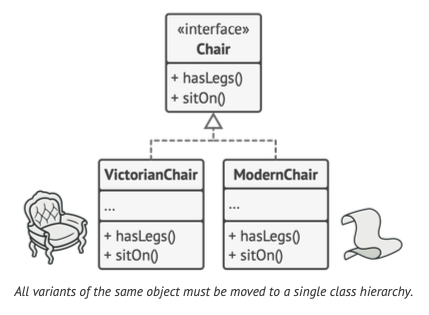

Then declare the ***Abstract Factory***, an interface with the creation methods for all transport tickets, as in `createBusTicket`, `createTrainTicket`, and `createPlaneTicket`. these methods ***MUST*** return ***abstract*** interfaces of those tickets, `BusTicket`, `TrainTicket`, and `PlaneTicket`.

Then, create an independent factry class that inherits from the ***Abstract Factory*** and that returns tickets of a particular kind as in, `EconomyBusTicket`, `EconomyTrainTicket`, and `EconomyPlaneTicket`.

In [ ]:
from abc import ABC, abstractmethod

class TicketFactory(ABC):
    @abstractmethod
    def create_BusTicket(self):
        return BusTicket
    @abstractmethod
    def create_TrainTicket(self):
        return TrainTicket
    @abstractmethod
    def create_PlaneTicket(self):
        return PlaneTicket

class EconomyTicketFactory(TicketFactory):
    def create_BusTicket(self):
        return EconomyBusTicket
    def create_TrainTicket(self):
        return EconomyTrainTicket
    def create_PlaneTicket(self):
        return EconomyPlaneTicket
    
class BusinessTicketFactory(TicketFactory):
    def create_BusTicket(self):
        return BusinessBusTicket
    def create_TrainTicket(self):
        return BusinessTrainTicket
    def create_PlaneTicket(self):
        return BusinessPlaneTicket
    
class PremiumTicketFactory(TicketFactory):
    def create_BusTicket(self):
        return PremiumBusTicket
    def create_TrainTicket(self):
        return PremiumTrainTicket
    def create_PlaneTicket(self):
        return PremiumPlaneTicket

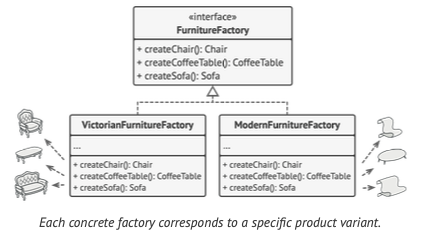

This generates interoperability that allows you to pass in whichever of the needed factories to work with the object that you want to, without breaking the client code. All inter-dependencies between the tickets' classes have been defined and encapsulated.
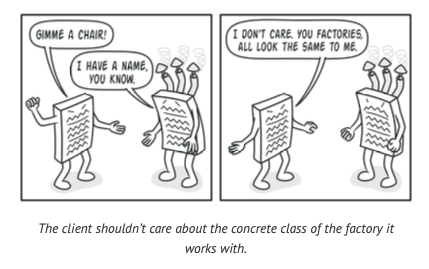

##### Structure

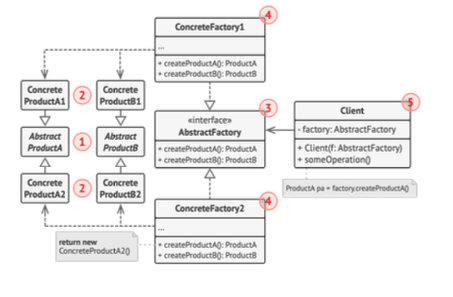

1. ***Abstract Products*** declare interfaces for the distinct products of the available families.
2. ***Concrete Products*** are the implementations of the ***Abstract Products** that are grouped by family. Each of the ***Abstract Products***'s families must be explicitly implemented.
3. ***Abstract Factory*** interface has the methods for creating each of the ***Abstract Products***
4. ***Concrete Factories*** implement the creation methods of the ***Abstract Factory***, corresponding to a specific varian of the ***Abstract Products*** families, creating only those products.
5. Even though concrete factories initilize concrete products, the signature of the creator methods must return the respective ***Abstract Products***. By doing this, the specific ***Abstract Product*** family dependencies are encapsulated and the ***Client*** doesn't get coupled.

##### Example

A cross-platform application checks which OS is being used at launch, and initializes an ***Abstract Factory*** that creates the objects for the corresponding OS. The rest of the application runs without taking care of the OS. 

In [ ]:
class GUIFactory(ABC):
    @abstractmethod
    def create_button(self):
        return Button()
    @abstractmethod
    def create_checkbox(self):
        return Checkbox()
    
class WinFactory(GUIFactory):
    def create_button(self):
        return WinButton()
    def create_checkbox(self):
        return WinCheckbox()
    
class MacFactory(GUIFactory):
    def create_button(self):
        return MacButton()
    def create_checkbox(self):
        return MacCheckbox()
    
class Button(ABC):
    @abstractmethod
    def paint(self):
        pass
    
class WinButton(Button):
    def paint(self):
        print('Paint Windows Button!')

class MacButton(Button):
    def paint(self):
        print('Paint Mac Button!')
        
class Checkbox(ABC):
    @abstractmethod
    def paint(self):
        pass
    
class WinCheckbox(Checkbox):
    def paint(self):
        print('Paint Windows Checkbox!')

class MacCheckbox(Checkbox):
    def paint(self):
        print('Paint Mac Checkbox!')
        
class Application:
    def __init__(self, factory: GUIFactory):
        self.factory = factory
    def createUI(self):
        self.button = self.factory.create_button()
    def paint(self):
        self.button.paint()

class ApplicationConfigurator:
    def main(self):
        config = readApplicationConfigFile()
        if config.OS == 'Windows':
            factory = WinFactory()
        elif config.OS == 'Mac':
            factory = MacFactory()
        else:
            raise Exception('OS not implemented!')
        return Application(factory)

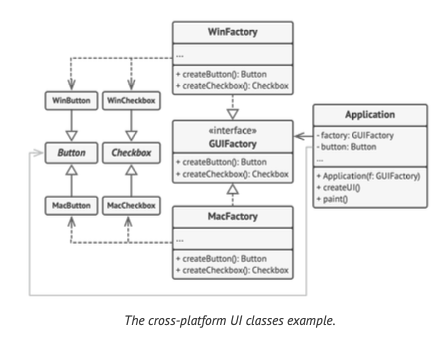

##### Applicability

* Use ***Abstract Factory*** when you need to handle various families of related products and don't wat the code to depend on concrete classes of those products. Allowing them to be unknown at the beggining ro to extend them in the future.
    * As longs as is the ***Abstract Factory*** the one that is creating the different objects the code will be able to handle them.
* Good soltuion when there's a class with a different set of ***Factory Methods** that make their responsabilities less precise.
    * A class should only be responsible for one thing. If it has multiple ***Factory Methods*** it means that the code is handling multiple reponsibilities that could be abstracted from in an ***Abstract Factory***.

##### How to Implement

1. Create the grid that matches products types versus variants
2. Declare the ***Abstract Product*** classes for all product types. Then make all the ***Concrete Product*** classes from those
3. Declare the ***Abstract Factory*** class with the method to create the set of all ***Abstract Products***
4. Implement the set of ***Concrete Factory*** classes, one for each variant of the product types
5. Create a factory initialization code in the application that handles which ***Concrete Factory*** class to use. Pass it to all classes that initialize products.
6. Review the code and find direct class to construct products. Replace them with calls to the ***Abstract Factory*** creation method 

##### Pros and Cons

* ***Pros:***
    * You are certain of the products' compatibility
    * Avoid tight coupling between the products and the client
    * ***Single Responsibility Principle.*** Product creation code is extracted to a single and encapsulated place
    * ***Open/Closed Principle.*** New variants of products can be introduced without modifying or breaking the code
* ***Cons:***
    * Code may become more complicated than it should be, as many extra interfaces are introduced.

##### Relations with Other Patterns

* Many designs astart from ***Factory Method*** and evolver to ***Abstract Factory***, ***Prototype***, or ***Builder***
* ***Builder*** focuses on constructing complex objects through their components, ***Abstract Factory*** specializes on creating families of related objects.
* ***Abstract Factory*** is often based on a set of ***Factory Methods***. ***Prototype*** can also be used for composability
* ***Abstract Factory*** serves as an alternative to ***Facade*** when the only thing that needs to be hidden is object creation
* ***Abstract Factory*** can be coupled with ***Bridge*** to encapsulate complex ***Bridge*** abstractions
* ***Abstract Factories***, ***Builders***, and ***Prototypes*** can all be implemented as ***Singletons***

#### Builder

##### Problem

When there's the need to laboriously initialize a complex object of many fields and nested objects, codes usually ends up buried inside monstruous constructors with many parameters, or scattered all over the client code. As in, when building a ***House***.

To build a basic ***House*** you need to build four walls, a floor, an entry door, some windows, and a roof, but a more complex ***House*** quickly gets out of hand. It might need 7 walls, a pool, a second floor, central heating, bathroom, or bathrooms, etc.

A straightforward solution might just be to extend the basic ***House*** class, creating new child classes for all the combinations and their needed parameters, but you'll quickly realize that that's a titanic task, and that the code that you will write will be practically un-maintainable.

Another approach might be to create a ***House*** class with a GIANT constructor method and many parameters that would control de creation of a particular ***House***. This would remove the need to maintain and write a lot of child classes for each particular house, but we will be left with a bunch of codes and parameters that most houses don't use.

##### Solution

Extract the object construction code out of its own class and move it to separate objects called ***Builders***.

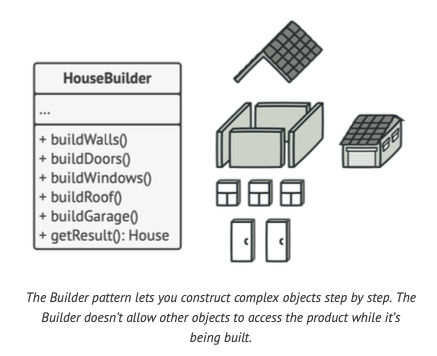

Pattern defines object construction as a series of steps (a recipe), were each ingerdient and step are called depending on the particular recipe, or ***House*** configuration, that is being built.

Some of the contruction steps might require different implementation methods, depending on the object. Walls could be made of concrete or wood.

For this, you can create different builder classes that implement the same building steps in a particular manner, and then use those builder in the construction process. A `ConcreteBuilder` and a `WoodBuilder`.

This would only be feasible if the client code were able to interact with each `Builder` through a common interface.

###### Director

You can even go further and create a class that has series of method to handle the building steps. A ***Director***.

This can allow to reuse building routines across the client code and also hides the details of product construction from the client code.

The client just associates a builder with a ***Director***, launches the construction with the ***Director*** and gets the corresponding result from the ***Builder***.

##### Structure

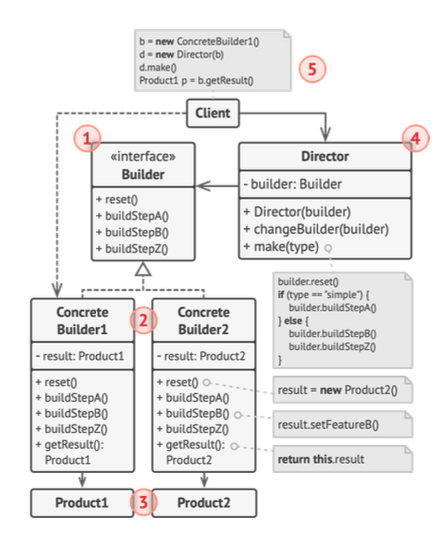

1. ***Builder*** class declares the product construction steps that are common to all types of builders
2. ***Concrete Builders*** provide different implementations of those construction steps, and produce products that might not neccesarily follow the common interface
3. ***Products*** are the results of the ***Builders*** construction. They don't need to belong to the same class hierarchy or parent class
4. ***Director*** class defines how to call the construction steps. Mostly for encapsulation and code reutilization
5. ***Client*** associates ***Builders*** with the ***Director***, usually just once, when creating the ***Director***. Then the ***Director*** uses those ***Builders*** for further construction.

##### Example

In [ ]:
class Car:
    def __init__(self):
        self.seats = None
        self.engine = None
        self.computer = None
        self.gps = None
    
class Truck:
    def __init__(self):
        self.seats = None
        self.engine = None
        self.computer = None
        self.gps = None
        self.cargo_bed = None
    
class Builder(ABC):
    @abstractmethod
    def reset(self):
        pass
    @abstractmethod
    def set_seats(self, seats):
        pass
    @abstractmethod
    def set_engine(self, engine):
        pass
    @abstractmethod
    def set_computer(self, computer):
        pass
    @abstractmethod
    def set_gps(self, gps):
        pass
    
class CarBuilder(Builder):
    def __init__(self):
        self.reset()
    def reset(self):
        self.car = Car()
    def set_seats(self, seats):
        self.car.seats = seats
    def set_engine(self, engine):
        self.car.engine = engine
    def set_computer(self, computer):
        self.car.computer = computer
    def set_gps(self, gps):
        self.car.gps = gps
    def get_product(self) -> Car:
        product = self.car
        self.reset()
        return product
    
class TruckBuilder(Builder):
    def __init__(self):
        self.reset()
    def reset(self):
        self.truck = Truck()
    def set_seats(self, seats):
        self.truck.seats = seats
    def set_engine(self, engine):
        self.truck.engine = engine
    def set_computer(self, computer):
        self.truck.computer = computer
    def set_gps(self, gps):
        self.truck.gps = gps
    def set_cargo_bed(self, cargo_bed):
        self.truck.cargo_bed = cargo_bed        
    def get_product(self) -> Truck:
        product = self.truck
        self.reset()
        return product

class Director:
    def construct_sports_car(self, builder: Builder):
        builder.reset()
        builder.set_seats(2)
        builder.set_engine(SportsEngine())
        builder.set_computer(True)
        builder.set_gps(True)
        
    def construct_family_car(self, builder: Builder):
        builder.reset()
        builder.set_seats(6)
        builder.set_engine(VanEngine())
        builder.set_computer(False)
        builder.set_gps(False)
        
    def construct_truck(self, builder: Builder):
        builder.reset()
        builder.set_seats(2)
        builder.set_engine(TruckEngine())
        builder.set_computer(False)
        builder.set_gps(True)
    
class Application:
    def make_sports_car_family_car_and_truck(self):
        director = Director()
        builder = CarBuilder()
        director.construct_sports_car(builder)
        sports_car = builder.get_product()
        
        director.construct_family_car(builder)
        family_car = builder.get_product()
        
        builder = TruckBuilder()
        director.construct_truck(builder)
        truck = builder.get_product()
        
        return sports_car, family_car, truck

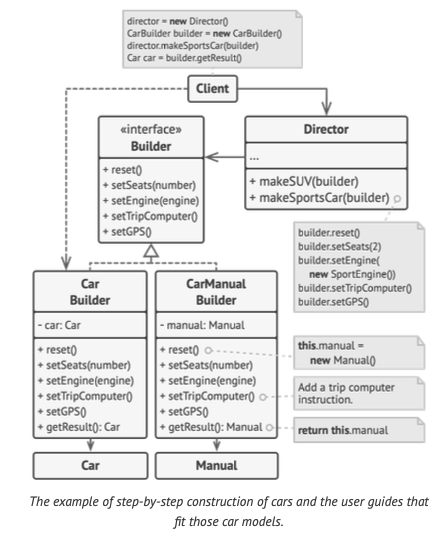

##### Applicability

* Use ***Builder*** to get rid of monstruous constructors.
    * A high number of parameters in the constructor makes it very inconvenient to call, handle, extend and maintain. With the ***Builder*** method you can construct them step by step.
* When you want your code to be able to create different variations of the some product (as in the ***House*** example.
    * Base ***Builder*** interface defines all possible construction steps, and concrete builders implement them in their own specific representation, while the ***Director** guides the order of construction.
* When you need to construct Composite trees or other complex objects.
    * By constructing objects step by step you can defer execution of some without breaking the final product, and ***Builders*** don't expose unfinished products while running the construction steps, thus disabling the ***Client*** from fetching an incomplete product.

##### How to Implement

1. Clearly identify and define the common construction steps for building all available product representations.
2. Declare these construction steps in the base ***Builder*** interface
3. Create a ***Concrete Builder*** class for each of the product representations and implement their construction steps.
    * Remember to implement a method for returning the result of the construction. This can't be defined in the ***Builder*** class as various ***Builders*** may construct products that don't shate the same parent class.
4. Write a ***Director*** class if helpful.
5. Make the ***Client*** code create both the ***Builder*** and the ***Director*** objects.
    * Before construction, the ***Client*** must pass a ***Builder*** to the ***Director***, usually only once, via the parameters of the ***Director*** class constructor.
    * Then the ***Director*** uses the ***Builder*** for further construction.
    * It could also be that the ***Builder*** is passed to a specific construction method of the ***Director***.
6. Construction result can be obtained directly from the ***Director*** if all products share a common parent class. Otherwise, the ***Client*** should fetch it from the ***Builder***.

##### Pros and Cons

* ***Pros:***
    * Construction is made step by step.
    * Construction code can be reutilized when building different representations of products.
    * ***Single Responsibility Principle.*** Encapsulate complex construction code from the ***Client*** operation.
* ***Cons:***
    * Overall complexity increases.

##### Relations with Other Patterns

* Many designs astart from ***Factory Method*** and evolver to ***Abstract Factory***, ***Prototype***, or ***Builder***
* ***Builder*** focuses on constructing complex objects through their components, ***Abstract Factory*** specializes on creating families of related objects.
* ***Abstract Factory*** is often based on a set of ***Factory Methods***. ***Prototype*** can also be used for composability
* ***Builder*** can be used when creating complex ***Composite*** trees as the step by step approach allows for recursion
* ***Builder*** can be combined with ***Bridge***, where the ***Director*** plays the role of the abstraction and the ***Builders*** as the implementations
* ***Abstract Factories***, ***Builders***, and ***Prototypes*** can all be implemented as ***Singletons***

#### Prototype

Creational design pattern that focuses on copying existing objects without making the code dependent on the respective class.

##### Problem

When creating an exact copy of an object you might encounter fields that are private and invisible from the outside. Also, since you need to know how the class is to copy it, your code becomes dependent on the class. Furthermore, sometimes you might just know the object's interface, and not its innner workings.

##### Solution

***Prototype*** pattern delegates the process of cloning an object to the actual objects that are being cloned.

With a common interface for all objects that can be cloned, this allows for cloning on-demand without coupling your working code with the particular class of each object. It's custom that the common interface implements a single `clone` method.

The implementation of the `clone` method is very similar in all of the *to be cloned* classes, where it creates an object of the current class carrying over all the field values of the *to be cloned* object into the new one. This even allows for working with private fields as most programming languages allow objects of a class to access the private fields of another object of the same class.

An object that *can be cloned* is called a ***Prototype***. If an object has dozens of fields and hundreds of possible states, cloning them might serve as an alternative to creating child classes. When you need an object just like one you have already created, proceed to clone the created one, instead of initializing a new one with the configured fields.

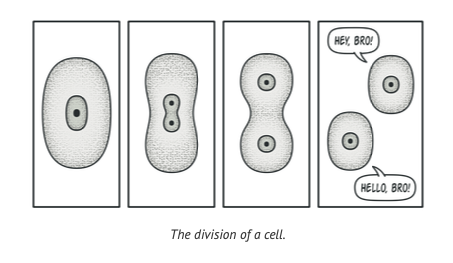

##### Structure

1. A ***Prototype*** interface declared the cloning methods. Usually a single `clone` method.
2. A ***Concrete Prototype*** interface declares the concrete cloning method. It copies the original object's configuration and data to the clone, and handle edge cases of the cloning process.
3. ***Client*** can produce a clone that follows the ***Prototype*** interface.

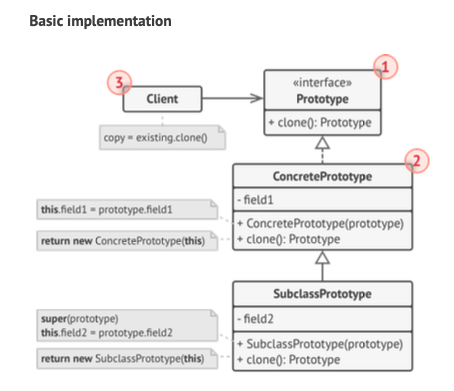

4. A ***Prototype Registry*** works as a catalogue of common used ***Prototypes***, and stores a set of pre-built objects that are ready to be copied. Simple case is a `name -> prototype` hash map, but any relation can be implemented.

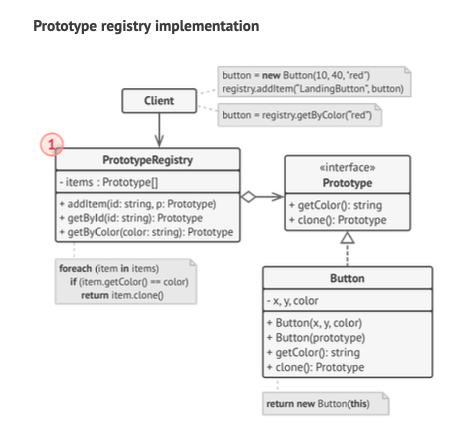

##### Example

In [ ]:
from typing import List

class Shape(ABC):
    def __init__(self, x=0, y=0, color=None, source=None):
        if source is None:
            self.X = x
            self.Y = y
            self.color = color
        else:
            self.X = source.X
            self.Y = source.Y
            self.color = source.color

    @abstractmethod
    def clone(self):
        pass

    
class Rectangle(Shape):
    def __init__(self, x=0, y=0, color=None, width=0, height=0, source=None):
        super().__init__(x, y, color, source)
        if source is None:
            self.width = width
            self.height = height
        else: 
            self.width = source.width
            self.height = source.height

    def clone(self):
        return Rectangle(source=self)
    
    
class Circle(Shape):
    def __init__(self, x=0, y=0, color=None, radius=0, source=None):
        super().__init__(x, y, color, source)
        if source is None:
            self.width = width
            self.height = height
        else: 
            self.width = source.width
            self.height = source.height

    def clone(self):
        return Rectangle(source=self)
    

class Application:
    def __init__(self, shapes: List[Shape]):
        self.shapes = shapes
        
        circle = Circle(x=10, y=10, color='white', radius=20)
        self.shapes.append(circle)
        
        copied_circle = circle.clone()
        self.shapes.append(copied_circle)
        
        rectangle = Recatngle(width=10, height=20)
        self.shapes.append(rectangle)
        
    def business_logic(self):
        
        copied_shapes = []
        for s in self.shapes:
            copied_shapes.append(s.clone())

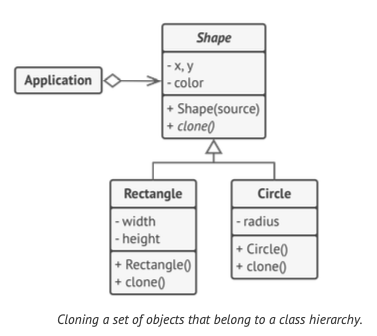

##### Applicability

* Use ***Prototype*** when your code must not depend on the concrete objects that you need to copy
    * Recurrent when code works with objects that are passed from a 3rd party code through some interface. Those concrete classes are unknown and you can't depend on them,
    * ***Prototype*** pattern provides the ***Client*** with a general interface to handle all the objects that can be cloned.
* Use ***Prototype*** to reduce the number of child classes that differ slightly in the way they are intialized from the parent class
    * There's a complex class that requires a lot of initialization configuration depending on what you want to use it for. To reduce duplicated code of the child classes, just implement the ***Prototype*** pattern with a set of pre-built objects configured in the needed ways as ***Prototypes***. The ***Client*** can now look for the corresponding ***Prototype*** and clone it.

##### How to Implement

1. Create the ***Prototype*** interface with the `clone` method, or just add the `clone` method to all objects in a class hierarchy.
2. ***Prototype*** classes must define the alternative constructor that can receive an object of that class as an argument. Constructor must copy the values of all fields from the given class into the new instance of the same class.
3. Cloning method typically is a single line with the initialization of the corresponding class and passing the constructed *to be cloned* object.
4. You can also create a centralized ***Prototype Registry*** to store a catalog of frequently used prototypes. It just searches for a particular ***Prototype*** based on arguments passed by the ***Client***.

##### Pros and Cons

* ***Pros:***
    * Objects can be cloned without coupling to the concrete class
    * Repeated intialization can be replaced with clones of already initialized objects
    * Complex objects can be produced more easily
    * Works as an alternative to inheritance when dealing with configuration presets for complex classes
* ***Cons:***
    * Cloning complex objects that have circular references might produce a lot of complex and unwanted behavior

##### Relations with Other Patterns

* Many designs start from ***Factory Method*** and evolve to ***Abstract Factory***, ***Prototype***, or ***Builder***
* ***Abstract Factory*** classes are often based on ***Factory Methods***, but ***Prototype*** can also be used to compose the methods of these classes
* ***Prototype*** can help when you need to save copies of ***Commands***
* Designs with strong ***Composite*** and ***Dectorator*** can often benefit from ***Prototype***
* ***Prototype*** isn't inheritance based, so it doesn't have its problems. But requires complicated initialization methods of the cloned objects. On the other hand, ***Factory Method*** is based on inheritance, but doesn't require an initialization step.
* ***Prototype*** might be simpler than ***Memento*** in cases where the *to be cloned* obaject is simple and doesn't have external references
* ***Abstract Factory***, ***Builders***, and ***Prototypes*** can all be implemented as ***Singleton***

#### Singleton

Creational design patterns that allows for ensuring that a class has only a single initialized instance, while providing a global acess point to it.

##### Problem

1. In cases, like when connecting to a Database, you might want to ensure that a class has just a single active instance.
2. In the same case, if you might also need to have that single instance globally available

##### Solution

* Creat a class that:
    1. Has a private constructor method that other objects can't use.
    2. Create a static initialization method that works as the constructor, by calling it under the hood, and storing it in a static field. Following calls for the initialization should return the already populated field.
    
***In this way, when the object is called in any place of the code, it would always return the same object.***

##### Structure

1. ***Singleton*** classes declare static methods to `get_instance` that returns an the active instance of the class.
2. A private construction method forces the ***Client*** to use the `get_instance` method.

##### Example

In [ ]:
from threading import Lock

class Database:
    _instance = None
    _lock = Lock()
    def __init__(self):
        pass
    @classmethod
    def get_instance(cls):
        if cls._instance is None:
            with cls._lock:
                if cls._instance is None:
                    cls._instance = cls()
        return cls._instance
    def query(self, sql):
        pass
    

class Application:
    def main(self):
        foo = Database.get_instance()
        foo.query('SELECT *')
        
        bar = Database.get_instance()
        foo.query('SELECT *')
    
    
database = Database.get_instance()
print(database.__hash__())
database2 = Database.get_instance()
print(database2.__hash__())

##### Applicability

* ***Singleton*** for when a class should have just a single instance at all time, to all clients
    * Disables all other means of creating duplicated objects except for the stablished `get_instance` to assure that the object is initialized only once, and returned whenever needed
* ***Singleton*** for when you need stricter control over some globla variables
    * ***Singleton*** guarantees that there exists only a single instance, nothing excepto for the ***Singleton*** class can replaced its instance
    * The `get_instance` method can also be modified to ensure that there's a N-amount of active instances

##### How to Implement

1. Add a private static field to store the active instance
2. Define the public creation method for getting the ***Singleton*** instance
3. Make the construcotr of the ***Singleton*** class private
4. Go over the code and replace all direct calls to the ***Singleton***, and replace by the `get_instance` method

##### Pros and Cons

* ***Pros:***
    * Assure that a class has only a single instance
    * Gain global access to that class
    * ***Singleton*** instance is only initialized once
* ***Cons:***
    * Violates *Single Responsibility Principle*. Pattern solves two problems at a time
    * ***Singleton*** can mask bad design
    * ***Singleton*** requires special treatment when working with multithreads
    * Might be difficult to test

##### Relations with Other Patterns

* ***Facade*** can often be transformed into ***Singleton***, as a single ***Facade*** is usually sufficient
* ***Flyweight*** resembles ***Singleton*** if the shared states are reduced to a single ***Flyweight*** object. There are still some differences:
    * There should only be one ***Singleton*** instance, ***Flyweight*** can have multiple instances with different states
    * ***Singleton*** object can be mutable, while ***Flyweight*** objects are immutable
* ***Abstract Factory***, ***Builder***, and ***Prototype*** can all be ***Singletons***

### Structural Design Patterns

### Behavioral Design Patterns